In [1]:
from bs4 import BeautifulSoup as bs
import requests
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
import numpy as np
import pandas as pd

In [2]:
link = 'https://news.google.com/news/rss'

In [3]:
page = requests.get(link)

In [4]:
page

<Response [200]>

In [5]:
page.content

b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><rss version="2.0" xmlns:media="http://search.yahoo.com/mrss/"><channel><generator>NFE/5.0</generator><title>Top stories - Google News</title><link>https://news.google.com/?hl=en-IN&amp;gl=IN&amp;ceid=IN:en</link><language>en-IN</language><webMaster>news-webmaster@google.com</webMaster><copyright>2021 Google Inc.</copyright><lastBuildDate>Wed, 07 Jul 2021 15:18:34 GMT</lastBuildDate><description>Google News</description><item><title>PM Modi expands his Cabinet: Full list of new Union ministers - Times of India</title><link>https://news.google.com/__i/rss/rd/articles/CBMie2h0dHBzOi8vdGltZXNvZmluZGlhLmluZGlhdGltZXMuY29tL2luZGlhL3BtLW1vZGktZXhwYW5kcy1oaXMtY2FiaW5ldC1tZWV0LXRoZS1uZXctdW5pb24tbWluaXN0ZXJzL2FydGljbGVzaG93Lzg0MjA1MjY2LmNtc9IBdmh0dHBzOi8vbS50aW1lc29maW5kaWEuY29tL2luZGlhL3BtLW1vZGktZXhwYW5kcy1oaXMtY2FiaW5ldC1tZWV0LXRoZS1uZXctdW5pb24tbWluaXN0ZXJzL2FtcF9hcnRpY2xlc2hvdy84NDIwNTI2Ni5jbXM?oc=5</link><guid isPermaLink="false">5

In [6]:
soup = bs(page.content,'html.parser')

In [7]:
news = soup.find_all('title',)
news

[<title>Top stories - Google News</title>,
 <title>PM Modi expands his Cabinet: Full list of new Union ministers - Times of India</title>,
 <title>Cabinet expansion: 12 ministers, including Harsh Vardhan, Ravi Shankar Prasad, Javadekar resign - The Indian Express</title>,
 <title>Coronavirus: Most common symptoms reported if you contract coronavirus after vaccination - Times of India</title>,
 <title>CBSE class 10, 12 board exam results 2021 this month: Important points - Hindustan Times</title>,
 <title>Judge recuses self from hearing Nandigram poll plea, imposes Rs 5 lakh cost on Mamata Banerjee - Times of India</title>,
 <title>Pending editions of JEE-Mains to be held in July and August: Details - The News Minute</title>,
 <title>Royal Rebel Scindia: Congress' First Bencher Has Now Moved to BJP's Cabinet - News18</title>,
 <title>Born In Tibet, Have Been Longest Guest Of India, Feel Proud: Dalai Lama - NDTV</title>,
 <title>NCP leader Eknath Khadse’s son-in-law arrested by ED in Pun

In [8]:
statement = []
for i in range(0,len(news)):
    statement.append(news[i].get_text())

In [9]:
statement.pop(0)

'Top stories - Google News'

In [10]:
import pandas as pd
df = pd.DataFrame()

In [11]:
df['x'] = statement

In [12]:
df.head()

,x
0,PM Modi expands his Cabinet: Full list of new ...
1,"Cabinet expansion: 12 ministers, including Har..."
2,Coronavirus: Most common symptoms reported if ...
3,"CBSE class 10, 12 board exam results 2021 this..."
4,Judge recuses self from hearing Nandigram poll...


In [13]:
data = df.x.values.tolist()
data

['PM Modi expands his Cabinet: Full list of new Union ministers - Times of India',
 'Cabinet expansion: 12 ministers, including Harsh Vardhan, Ravi Shankar Prasad, Javadekar resign - The Indian Express',
 'Coronavirus: Most common symptoms reported if you contract coronavirus after vaccination - Times of India',
 'CBSE class 10, 12 board exam results 2021 this month: Important points - Hindustan Times',
 'Judge recuses self from hearing Nandigram poll plea, imposes Rs 5 lakh cost on Mamata Banerjee - Times of India',
 'Pending editions of JEE-Mains to be held in July and August: Details - The News Minute',
 "Royal Rebel Scindia: Congress' First Bencher Has Now Moved to BJP's Cabinet - News18",
 'Born In Tibet, Have Been Longest Guest Of India, Feel Proud: Dalai Lama - NDTV',
 'NCP leader Eknath Khadse’s son-in-law arrested by ED in Pune land deal case - The Indian Express',
 'Magnitude-5.2 earthquake jolts Assam, tremors felt in Meghalaya, Bengal - Times of India',
 'Haiti President Jo

# Data Cleaning

In [14]:
import re
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

In [15]:
data = pd.Series(data)

In [16]:
# lets do some preprocessing and move on 
# here we are going to use regex for data cleaning
import re
data_processed = data.apply(lambda x: re.sub(r'[^a-zA-Z/s]+',' ',x).lower())
data_processed

0     pm modi expands his cabinet full list of new u...
1     cabinet expansion ministers including harsh va...
2     coronavirus most common symptoms reported if y...
3     cbse class board exam results this month impor...
4     judge recuses self from hearing nandigram poll...
5     pending editions of jee mains to be held in ju...
6     royal rebel scindia congress first bencher has...
7     born in tibet have been longest guest of india...
8     ncp leader eknath khadse s son in law arrested...
9     magnitude earthquake jolts assam tremors felt ...
10    haiti president jovenel moise assassinated at ...
11    international flights update travellers from i...
12    singapore not counting sinovac shots in covid ...
13    us defends afghanistan withdrawal afghan force...
14    sensex settles above for first time led by hdf...
15    indian banks to see bad loans peaking post fy ...
16    ahead of ipo paytm rejigs its board moneycontr...
17    clean science and technology ipo opens tod

In [17]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
# now lets deal with stopwords 
# using nltk stopwords 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(["the", "india", "times", "hindustan times", "indian express", "hindustan", "indian",'gsmarenacom', "express", "ndtv",'news18','news','DNA India','moneycontrol','news18','gsmarena','com'])
len(stop_words)

196

In [19]:
from nltk import word_tokenize

In [20]:
data_final = data_processed.apply(lambda x:' '.join([word for word in word_tokenize(x) if word not in stop_words and len(word)> 2]))

In [21]:
data_final[0:2]

0    modi expands cabinet full list new union minis...
1    cabinet expansion ministers including harsh va...
dtype: object

# EDA

In [22]:
words_list = []
for sentence in data_final:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)
#freq_dist.keys()

[('covid', 4),
 ('cabinet', 3),
 ('new', 3),
 ('coronavirus', 3),
 ('says', 3),
 ('ministers', 2),
 ('symptoms', 2),
 ('vaccination', 2),
 ('board', 2),
 ('details', 2),
 ('first', 2),
 ('countries', 2),
 ('ipo', 2),
 ('today', 2),
 ('galaxy', 2),
 ('surface', 2),
 ('mobile', 2),
 ('nasa', 2),
 ('moon', 2),
 ('four', 2)]

In [23]:
words_list

['modi',
 'expands',
 'cabinet',
 'full',
 'list',
 'new',
 'union',
 'ministers',
 'cabinet',
 'expansion',
 'ministers',
 'including',
 'harsh',
 'vardhan',
 'ravi',
 'shankar',
 'prasad',
 'javadekar',
 'resign',
 'coronavirus',
 'common',
 'symptoms',
 'reported',
 'contract',
 'coronavirus',
 'vaccination',
 'cbse',
 'class',
 'board',
 'exam',
 'results',
 'month',
 'important',
 'points',
 'judge',
 'recuses',
 'self',
 'hearing',
 'nandigram',
 'poll',
 'plea',
 'imposes',
 'lakh',
 'cost',
 'mamata',
 'banerjee',
 'pending',
 'editions',
 'jee',
 'mains',
 'held',
 'july',
 'august',
 'details',
 'minute',
 'royal',
 'rebel',
 'scindia',
 'congress',
 'first',
 'bencher',
 'moved',
 'bjp',
 'cabinet',
 'born',
 'tibet',
 'longest',
 'guest',
 'feel',
 'proud',
 'dalai',
 'lama',
 'ncp',
 'leader',
 'eknath',
 'khadse',
 'son',
 'law',
 'arrested',
 'pune',
 'land',
 'deal',
 'case',
 'magnitude',
 'earthquake',
 'jolts',
 'assam',
 'tremors',
 'felt',
 'meghalaya',
 'bengal',


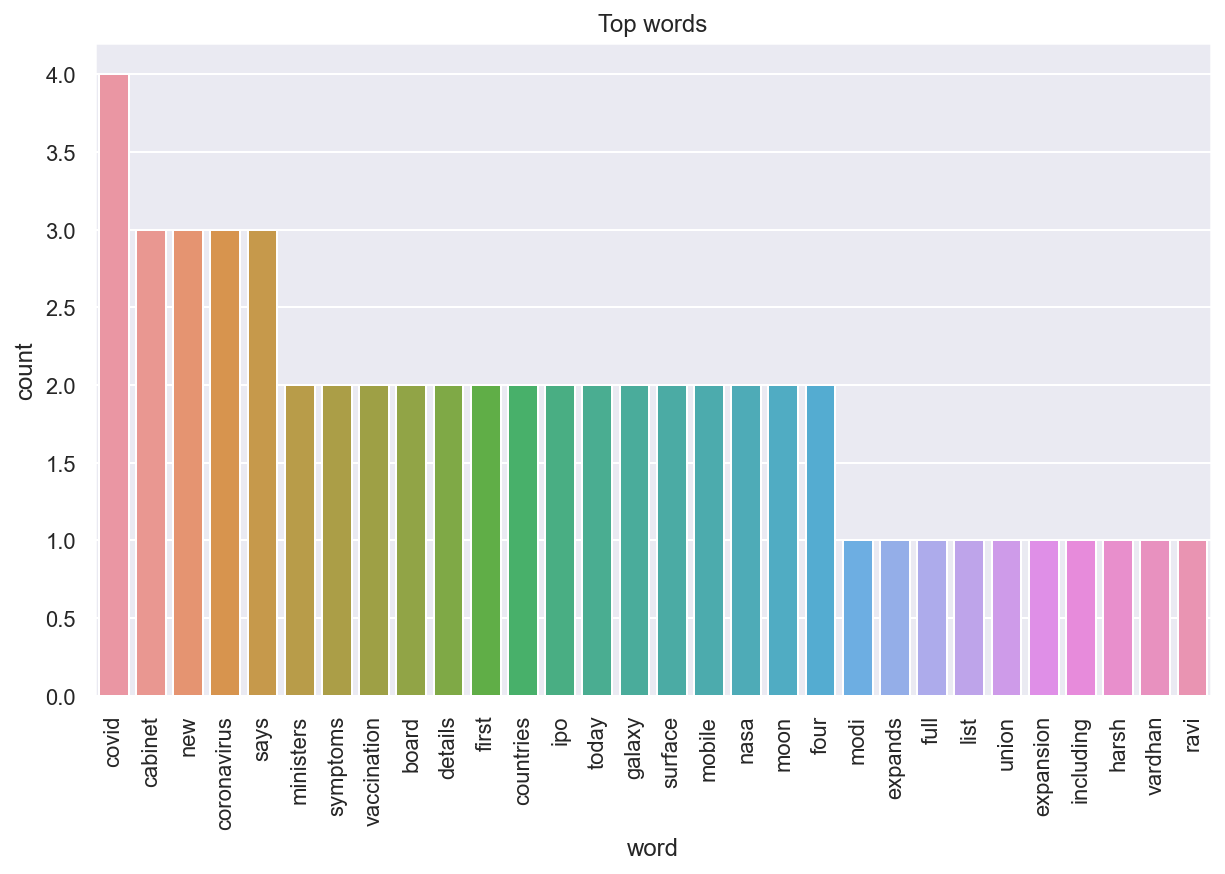

In [24]:
# creating a temporary dataframe and plotting the graph
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical');

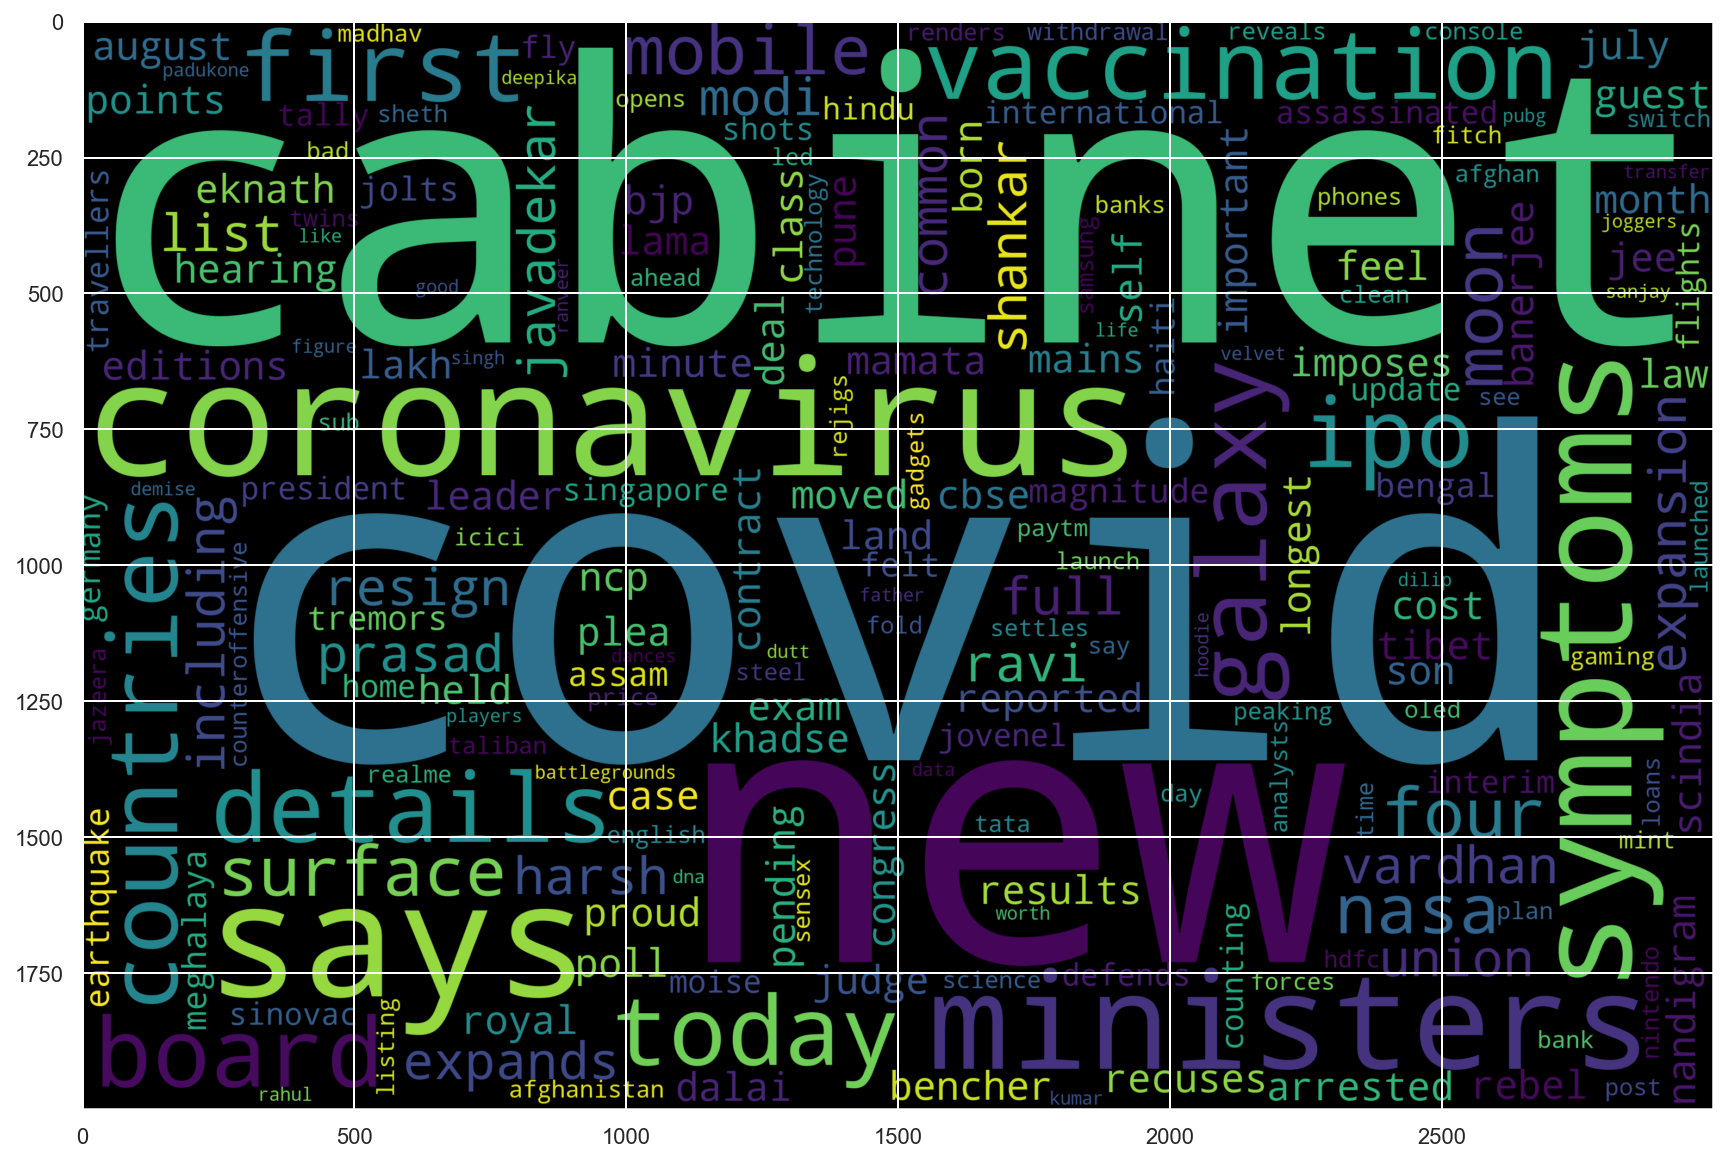

In [25]:
%config InlineBackend.figure_format = 'retina'

from wordcloud import WordCloud
import wordcloud
# creation of wordcloud
wcloud_fig = WordCloud( stopwords=set(wordcloud.STOPWORDS),
                      colormap='viridis', width=3000, height=2000).generate_from_frequencies(freq_dist)
#plotting the wordcloud
plt.figure(figsize=(16,10), frameon=True)

plt.imshow(wcloud_fig, interpolation  = 'bilinear')
plt.show()

# lets create a Bigram and trigram for more sense

1-Bigrams are two words frequently occurring together in the document. 

2-Trigrams are 3 words frequently occurring.

--Gensim’s Phrases model can build and implement the bigrams, trigrams, quadgrams and more. The two important arguments to Phrases are min_count and threshold. The higher the values of these param, the harder it is for words to be combined to bigrams.

In [26]:
#loading libraries 
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import models

/Applications/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [27]:
words_sent = [x.split() for x in data_final]
words_sent
bigram = Phrases(words_sent, min_count=3, threshold=100)
trigram = Phrases(bigram[words_sent], threshold=100)  

bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)

# bow = [bigram_phraser[word] for word in words_sent] # creating bigram
bow = [trigram_phraser[bigram_phraser[words]] for words in words_sent] # creating trigram and bigram,it give a more efficency to model

In [28]:
words_sent

[['modi', 'expands', 'cabinet', 'full', 'list', 'new', 'union', 'ministers'],
 ['cabinet',
  'expansion',
  'ministers',
  'including',
  'harsh',
  'vardhan',
  'ravi',
  'shankar',
  'prasad',
  'javadekar',
  'resign'],
 ['coronavirus',
  'common',
  'symptoms',
  'reported',
  'contract',
  'coronavirus',
  'vaccination'],
 ['cbse', 'class', 'board', 'exam', 'results', 'month', 'important', 'points'],
 ['judge',
  'recuses',
  'self',
  'hearing',
  'nandigram',
  'poll',
  'plea',
  'imposes',
  'lakh',
  'cost',
  'mamata',
  'banerjee'],
 ['pending',
  'editions',
  'jee',
  'mains',
  'held',
  'july',
  'august',
  'details',
  'minute'],
 ['royal',
  'rebel',
  'scindia',
  'congress',
  'first',
  'bencher',
  'moved',
  'bjp',
  'cabinet'],
 ['born', 'tibet', 'longest', 'guest', 'feel', 'proud', 'dalai', 'lama'],
 ['ncp',
  'leader',
  'eknath',
  'khadse',
  'son',
  'law',
  'arrested',
  'pune',
  'land',
  'deal',
  'case'],
 ['magnitude',
  'earthquake',
  'jolts',
  '

In [29]:
bow[0:10]

[['modi', 'expands', 'cabinet', 'full', 'list', 'new', 'union', 'ministers'],
 ['cabinet',
  'expansion',
  'ministers',
  'including',
  'harsh',
  'vardhan',
  'ravi',
  'shankar',
  'prasad',
  'javadekar',
  'resign'],
 ['coronavirus',
  'common',
  'symptoms',
  'reported',
  'contract',
  'coronavirus',
  'vaccination'],
 ['cbse', 'class', 'board', 'exam', 'results', 'month', 'important', 'points'],
 ['judge',
  'recuses',
  'self',
  'hearing',
  'nandigram',
  'poll',
  'plea',
  'imposes',
  'lakh',
  'cost',
  'mamata',
  'banerjee'],
 ['pending',
  'editions',
  'jee',
  'mains',
  'held',
  'july',
  'august',
  'details',
  'minute'],
 ['royal',
  'rebel',
  'scindia',
  'congress',
  'first',
  'bencher',
  'moved',
  'bjp',
  'cabinet'],
 ['born', 'tibet', 'longest', 'guest', 'feel', 'proud', 'dalai', 'lama'],
 ['ncp',
  'leader',
  'eknath',
  'khadse',
  'son',
  'law',
  'arrested',
  'pune',
  'land',
  'deal',
  'case'],
 ['magnitude',
  'earthquake',
  'jolts',
  '

In [30]:
### lemmatisation by using spacy and pos tagging
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) # disabing the parse and ner from pipeline it increase speed of pipeline

# here 'en' in spacy pipeline means the small version of language
#ner-name entity recognization

In [51]:
doc = nlp(' '.join(bow[2]))
for token in doc:
    print(token ,'=>', token.pos_)

coronavirus => NOUN
common => ADJ
symptoms => NOUN
reported => VERB
contract => NOUN
coronavirus => NOUN
vaccination => NOUN


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
# now lemmatising the whole corpus so that we can reach to the root words 
def lemmatization(texts, tags=['NOUN', 'ADJ', 'VERB', 'ADV','PROPN']): # filter noun and adjective(for topic modelling we need only this filter)
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in tags])
    return texts_out

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# now lemmatising the whole corpus so that we can reach to the root words 
def lemmatization(texts, tags=['NOUN', 'ADJ', 'VERB', 'ADV','PROPN']): # filter noun and adjective
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in tags])
    return texts_out

In [53]:
bag_of_words = lemmatization(bow)
bag_of_words #here we have only this pos[''NOUN', 'ADJ', 'VERB', 'ADV','PROPN'']

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['modi', 'expand', 'cabinet', 'full', 'list', 'new', 'union', 'minister'],
 ['cabinet',
  'expansion',
  'minister',
  'include',
  'harsh',
  'vardhan',
  'ravi',
  'shankar',
  'prasad',
  'javadekar',
  'resign'],
 ['coronavirus',
  'common',
  'symptom',
  'report',
  'contract',
  'coronavirus',
  'vaccination'],
 ['cbse', 'class', 'board', 'exam', 'result', 'month', 'important', 'point'],
 ['judge',
  'recuse',
  'self',
  'hear',
  'nandigram',
  'poll',
  'plea',
  'impose',
  'lakh',
  'cost',
  'mamata',
  'banerjee'],
 ['pende',
  'edition',
  'jee',
  'main',
  'hold',
  'july',
  'august',
  'detail',
  'minute'],
 ['royal',
  'rebel',
  'scindia',
  'congress',
  'first',
  'bencher',
  'move',
  'bjp',
  'cabinet'],
 ['bear', 'tibet', 'long', 'guest', 'feel', 'proud', 'dalai', 'lama'],
 ['ncp',
  'leader',
  'eknath',
  'khadse',
  'son',
  'law',
  'arrest',
  'pune',
  'land',
  'deal',
  'case'],
 ['magnitude',
  'earthquake',
  'jolt',
  'assam',
  'tremor',
  'feel

# Now we need to encode the whole corpus into some numbers

The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.



In [54]:
from gensim import corpora
id2word = corpora.Dictionary(bag_of_words)
print(id2word)
# here keys are some numbers and values are our words
#it provided id to all words

Dictionary(317 unique tokens: ['cabinet', 'expand', 'full', 'list', 'minister']...)


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
#  now lets create a encoded bag of words 
corpus_matrix = [id2word.doc2bow(sent) for sent in bag_of_words]
#  here we created corpus and it shown occurence of word id


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
corpus_matrix[0]

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]

In [38]:
### Now create our model by using gensim lda

In [69]:
# Creating the object for LDA model using gensim library
import gensim
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=corpus_matrix,id2word=id2word,
                                    num_topics=10, 
                                    random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=5,
                                           alpha='auto',
                                           per_word_topics=True)
lda_model.save('gensim_model.gensim')

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
lda_model.print_topics()
# doc_lda = lda_model[corpus_matrix]
#it shown a probability distribution

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.035*"mobile" + 0.018*"good" + 0.018*"player" + 0.018*"pubg" + 0.018*"figure" + 0.018*"dutt" + 0.018*"sanjay" + 0.018*"transfer" + 0.018*"dna" + 0.018*"dilip"'),
 (1,
  '0.019*"open" + 0.019*"list" + 0.019*"today" + 0.019*"important" + 0.019*"day" + 0.019*"technology" + 0.019*"ipo" + 0.019*"exam" + 0.019*"analyst" + 0.019*"science"'),
 (2,
  '0.018*"afghanistan" + 0.018*"cabinet" + 0.018*"defend" + 0.018*"force" + 0.018*"full" + 0.018*"english" + 0.018*"list" + 0.018*"withdrawal" + 0.018*"plan" + 0.018*"jazeera"'),
 (3,
  '0.021*"ndtvsport" + 0.021*"bleed" + 0.021*"fan" + 0.021*"messi" + 0.021*"america" + 0.021*"copa" + 0.021*"final" + 0.021*"semi" + 0.021*"lionel" + 0.021*"salute"'),
 (4,
  '0.014*"move" + 0.014*"congress" + 0.014*"first" + 0.014*"covid" + 0.014*"traveller" + 0.014*"olympic" + 0.014*"tokyo" + 0.014*"update" + 0.014*"bjp" + 0.014*"fly"'),
 (5,
  '0.041*"coronavirus" + 0.015*"hear" + 0.015*"judge" + 0.015*"plea" + 0.015*"lakh" + 0.015*"recuse" + 0.015*"lambda" 

# Visualisation of topic modelling

In [71]:
#import pyLDAvis.gensim_models as gensimvis

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
import pyLDAvis
import pyLDAvis.gensim_models 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.136753 -0.060740       1        1  14.143626
6     -0.138995 -0.077719       2        1  13.206959
5     -0.040897  0.145002       3        1  12.142872
9     -0.018375 -0.054476       4        1  11.110708
7      0.041983  0.055449       5        1  10.255011
8      0.011668  0.050078       6        1   9.227502
2      0.035221 -0.023782       7        1   8.385625
0     -0.032068 -0.014072       8        1   8.371590
1      0.004313 -0.021711       9        1   7.233592
3      0.000397  0.001972      10        1   5.922515, topic_info=            Term      Freq     Total Category  logprob  loglift
19   coronavirus  2.000000  2.000000  Default   30.000  30.0000
169       mobile  1.000000  1.000000  Default   29.000  29.0000
223       legend  1.000000  1.000000  Default   28.000  28.0000
93           say  2.000000  2.000000  Default   27.000  27.0000
3           list  1.000000  1.000000  Default   26.000  26.0000
..           ...       ...       ...      ...      ...      ...
233      olympic  0.040095  1.572990  Topic10   -6.248  -0.8431
6            new  0.040095  2.128749  Topic10   -6.248  -1.1456
148       launch  0.040095  1.649683  Topic10   -6.248  -0.8907
136          ipo  0.040095  1.572989  Topic10   -6.248  -0.8431
62          feel  0.040095  1.668591  Topic10   -6.248  -0.9021

[376 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
198       1  0.891281        aamir
219       6  0.977206        adult
108       7  1.004632       afghan
109       7  1.004632  afghanistan
135       1  0.887725        ahead
...     ...       ...          ...
260       2  0.909378        whole
230       6  0.977206         wish
117       7  1.004632   withdrawal
189       4  0.937775        worth
236       1  0.887725        yahoo

[268 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 6, 10, 8, 9, 3, 1, 2, 4])

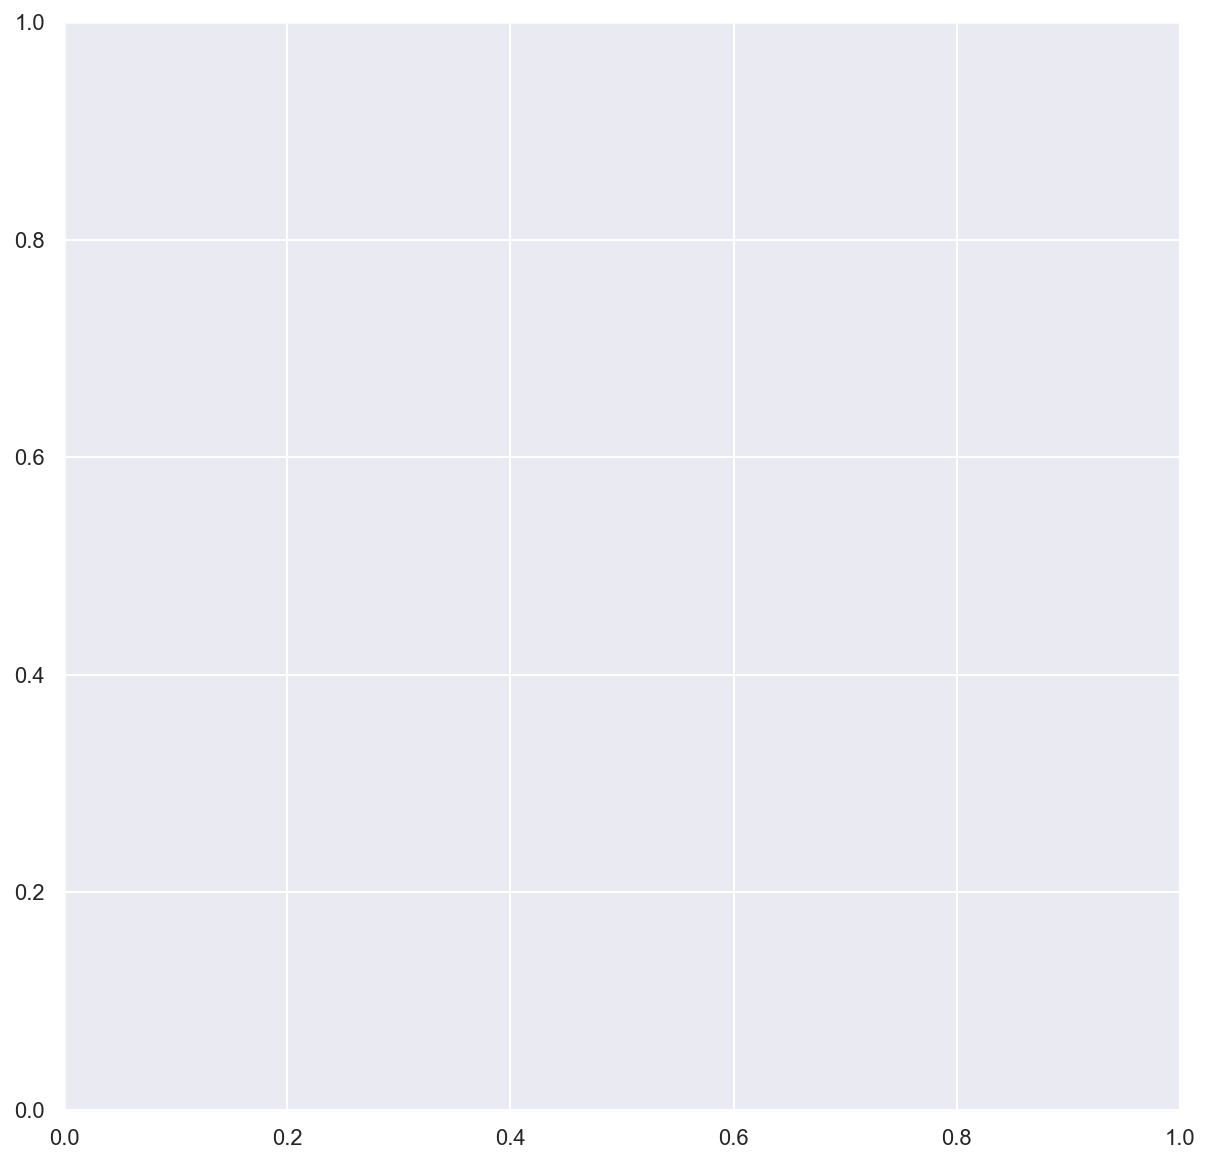

In [73]:

# Visualize the topics

# Visualize the topics
fig, ax = plt.subplots(figsize=(10, 10))
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus = corpus_matrix, dictionary = id2word)
vis

# Evaluation

### Compute Model Perplexity and Coherence Score¶

Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. 

In [67]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_matrix))  
##### a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=bag_of_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence() 
print('\nCoherence Score: ', coherence_lda)
### a measure of how good the model is. heigher the better


Perplexity:  -6.5364545483248575


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.4109458656409496


# Finding the number of topics
Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

The compute_coherence_values() (see below) trains multiple LDA models and provides the models and their corresponding coherence scores.

In [45]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LDA(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus_matrix, texts=bag_of_words, start=18, limit=40, step=6)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


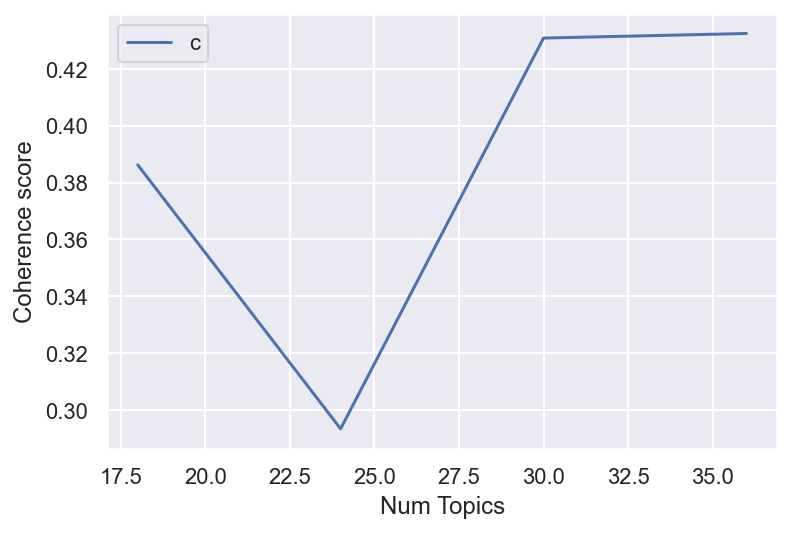

In [74]:
# Show graph
limit=40; start=18; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

#in figure,it is better to select 30 topic :

In [75]:
# Creating the object for LDA model using gensim library
import gensim
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=corpus_matrix,id2word=id2word,
                                    num_topics=30, 
                                    random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=5,
                                           alpha='auto',
                                           per_word_topics=True)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
lda_model.print_topics()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(15,
  '0.003*"krk" + 0.003*"kiran" + 0.003*"sana" + 0.003*"react" + 0.003*"rao" + 0.003*"mujhe" + 0.003*"laga" + 0.003*"ladki" + 0.003*"shaikh" + 0.003*"koimoi"'),
 (10,
  '0.003*"krk" + 0.003*"kiran" + 0.003*"sana" + 0.003*"react" + 0.003*"rao" + 0.003*"mujhe" + 0.003*"laga" + 0.003*"ladki" + 0.003*"shaikh" + 0.003*"koimoi"'),
 (2,
  '0.003*"krk" + 0.003*"kiran" + 0.003*"sana" + 0.003*"react" + 0.003*"rao" + 0.003*"mujhe" + 0.003*"laga" + 0.003*"ladki" + 0.003*"shaikh" + 0.003*"koimoi"'),
 (14,
  '0.003*"krk" + 0.003*"kiran" + 0.003*"sana" + 0.003*"react" + 0.003*"rao" + 0.003*"mujhe" + 0.003*"laga" + 0.003*"ladki" + 0.003*"shaikh" + 0.003*"koimoi"'),
 (22,
  '0.003*"krk" + 0.003*"kiran" + 0.003*"sana" + 0.003*"react" + 0.003*"rao" + 0.003*"mujhe" + 0.003*"laga" + 0.003*"ladki" + 0.003*"shaikh" + 0.003*"koimoi"'),
 (5,
  '0.003*"krk" + 0.003*"kiran" + 0.003*"sana" + 0.003*"react" + 0.003*"rao" + 0.003*"mujhe" + 0.003*"laga" + 0.003*"ladki" + 0.003*"shaikh" + 0.003*"koimoi"'),
 (13,


In [50]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_matrix))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=bag_of_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.8186913863250185


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.4252268505848436
